<a href="https://colab.research.google.com/github/GabrielFePL/Machine-Learning-Fatec-Matao/blob/main/CreditArtificialNeuronDevelopmentAndNeuralDataPipeline_Class_08_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Fatec Matão

## Pré-Processamento de Dados

### Importação de Bibliotecas

* O pandas é uma biblioteca do Python usada para manipulação e análise de dados, oferecendo estruturas como DataFrame e Series para organizar, filtrar, transformar e visualizar dados de forma eficiente. Documentação: https://pandas.pydata.org/docs/

* O NumPy é uma biblioteca do Python para cálculos numéricos, oferecendo arrays multidimensionais eficientes e funções matemáticas otimizadas para operações científicas e estatísticas. Documentação: https://numpy.org/doc/

* O Seaborn é uma biblioteca do Python para visualização de dados, baseada no Matplotlib, que facilita a criação de gráficos estatísticos elegantes e informativos com menos código. Documentação: https://seaborn.pydata.org/

* O matplotlib.pyplot é um módulo do Matplotlib que permite criar gráficos estáticos, interativos e personalizados em Python, sendo amplamente usado para visualização de dados. Documentação: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

* O plotly.express é uma biblioteca do Python para criar gráficos interativos e dinâmicos de forma simples, permitindo visualizações ricas e personalizáveis com poucos comandos. Documentação: https://plotly.com/python-api-reference/plotly.express.html

* O sklearn.preprocessing.StandardScaler é uma ferramenta do Scikit-learn para padronizar dados, centralizando a média em 0 e a variância em 1. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

* O sklearn.model_selection.train_test_split é uma função do Scikit-learn para dividir conjuntos de dados em treinos e testes de forma aleatória. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

* O pickle é um módulo do Python para serialização e desserialização de objetos Python, permitindo salvar e carregar modelos treinados. Documentação: https://docs.python.org/pt-br/dev/library/pickle.html

In [1]:
!pip install plotly --upgrade
!pip install squarify --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
import pickle

### Carregamento do Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
credit_dataframe = pd.read_csv('/content/drive/MyDrive/machine_learning_semestre_5/credit_data.csv')
credit_dataframe

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


### Análise do Dataset

In [5]:
credit_dataframe.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [6]:
credit_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [7]:
credit_dataframe.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [8]:
credit_dataframe.loc[pd.isnull(credit_dataframe['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [9]:
credit_dataframe.loc[credit_dataframe['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [10]:
np.unique(credit_dataframe['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

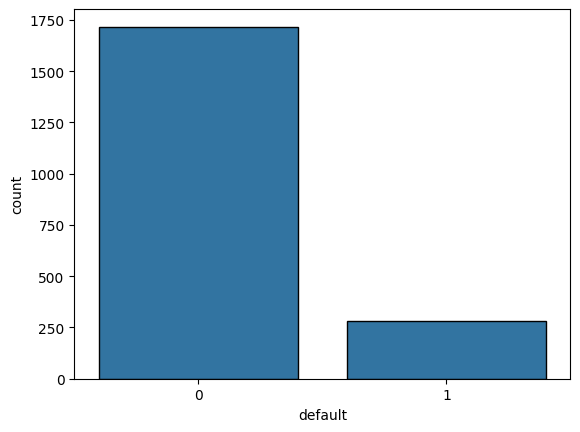

In [11]:
sns.countplot(x = credit_dataframe['default'], edgecolor = 'black');

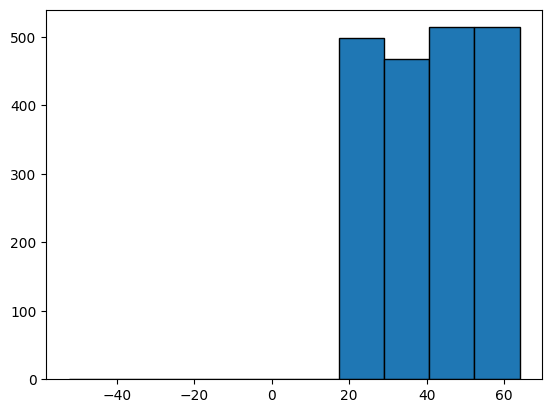

In [12]:
plt.hist(x = credit_dataframe['age'], edgecolor = 'black');

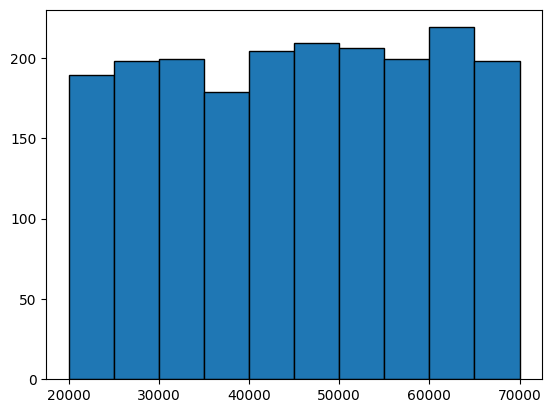

In [13]:
plt.hist(x = credit_dataframe['income'], edgecolor = 'black');

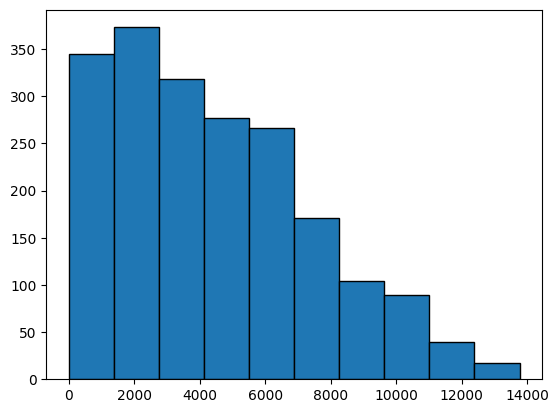

In [14]:
plt.hist(x = credit_dataframe['loan'], edgecolor = 'black');

In [15]:
graphic = px.scatter_matrix(credit_dataframe, dimensions=['age', 'income', 'loan'], color = 'default')
graphic.show()

### Correção de Anomalias e Outliers

In [16]:
credit_dataframe['age'].mean()

40.80755937840458

In [17]:
credit_dataframe_anomalic_age = credit_dataframe
credit_dataframe_anomalic_age

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [18]:
credit_dataframe_anomalic_age = credit_dataframe_anomalic_age.drop(credit_dataframe_anomalic_age[credit_dataframe_anomalic_age['age'] < 0].index)
credit_dataframe_anomalic_age

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [19]:
structured_age_mean = credit_dataframe_anomalic_age['age'].mean()
structured_age_mean

40.92770044906149

In [20]:
credit_dataframe.loc[credit_dataframe['age'] < 0, 'age'] = structured_age_mean
credit_dataframe

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [21]:
credit_dataframe['age'].mean()

40.92770044906149

In [22]:
credit_dataframe['age'].fillna(credit_dataframe['age'].mean(), inplace=True)
credit_dataframe

<ipython-input-22-3b723c5cbce6>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [23]:
credit_dataframe.isnull().sum()

,0
clientid,0
income,0
age,0
loan,0
default,0


In [24]:
credit_dataframe['age'].mean()

40.92770044906149

### Normalização dos Dados

#### Separação de Preditores e Classe

In [25]:
x_credit = credit_dataframe.iloc[:, 1:4].values
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [26]:
y_credit = credit_dataframe.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

#### Padronização dos Dados

In [27]:
x_credit = scaler.fit_transform(x_credit)
x_credit

array([[ 1.45393393,  1.36538005,  1.20281942],
       [-0.76217555,  0.54265932,  0.69642695],
       [ 0.83682073,  1.67417101,  1.17471147],
       ...,
       [-0.07122592, -0.97448606,  0.35420081],
       [-0.11000289,  1.73936652, -0.92675625],
       [ 1.682986  ,  1.14917551,  0.96381038]])

### Divisão e Exportação dos Dados de Treinamento e Teste

In [28]:
x_credit_train, x_credit_test, y_credit_train, y_credit_test = train_test_split(x_credit, y_credit, test_size=0.25, random_state=0)

In [29]:
x_credit_train.shape, x_credit_test.shape, y_credit_train.shape, y_credit_test.shape

((1500, 3), (500, 3), (1500,), (500,))

In [30]:
with open('/content/drive/MyDrive/machine_learning_semestre_5/Pickle/credit.pkl', mode='wb') as f:
  pickle.dump([x_credit_train, x_credit_test, y_credit_train, y_credit_test], f)

## Ingestão Baysidiana de Dados

### Importação de Bibliotecas

* O sklearn.naive_bayes.GaussianNB é um classificador Naive Bayes do Scikit-learn que assume que os atributos seguem uma distribuição Gaussiana (normal). É amplamente utilizado para problemas de classificação contínua e oferece métodos rápidos para ajustar o modelo e fazer previsões. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

* O sklearn.naive_bayes.MultinomialNB é um classificador Naive Bayes do Scikit-learn adequado para dados discretos, como contagens de frequência. Frequentemente utilizado para classificação de texto e problemas de análise de sentimentos, ele calcula a probabilidade dos atributos com base na distribuição multinomial. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

* O sklearn.metrics.accuracy_score é uma função do Scikit-learn que calcula a acurácia de um modelo de classificação, comparando as previsões com os valores reais. É amplamente utilizada para avaliar o desempenho de modelos classificatórios, retornando a proporção de previsões corretas. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

* O sklearn.metrics.classification_report é uma função do Scikit-learn que gera um relatório com as principais métricas de avaliação de modelos classificatórios, incluindo precisão, recall, F1-score e suporte para cada classe. É útil para interpretar o desempenho do modelo de forma detalhada e comparativa. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

* O yellowbrick.classifier.ConfusionMatrix é um visualizador da biblioteca Yellowbrick que gera uma matriz de confusão gráfica para modelos de classificação. Ele permite visualizar o desempenho do modelo de maneira intuitiva, destacando verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos em um gráfico interativo e colorido. É especialmente útil para análise comparativa e interpretação de resultados. Documentação: https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

In [52]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

### Carregamento da Base de Dados para Ingestão Neural

In [32]:
with open('/content/drive/MyDrive/machine_learning_semestre_5/Pickle/credit.pkl', 'rb') as f:
  x_credit_train, x_credit_test, y_credit_train, y_credit_test = pickle.load(f)

### Criação e Treinamento de Neurônios Artificiais

#### Modelo Gaussian NB

In [33]:
gnb_credit = GaussianNB()
gnb_credit.fit(x_credit_train, y_credit_train)

GaussianNB()

#### Modelo Decision Tree Classifier

In [41]:
dtc_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc_credit.fit(x_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Modelo Random Forest Classifier

In [54]:
rfc_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
rfc_credit.fit(x_credit_train, y_credit_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

### Teste e Métricas de Neurôios Artificiais

#### Modelo Gaussian NB

In [34]:
gnb_credit_predict = gnb_credit.predict(x_credit_test)

##### Acurácia

In [35]:
gnb_accuracy = accuracy_score(y_credit_test, gnb_credit_predict)
gnb_accuracy

0.938

In [36]:
print('P(A) = ' + str(gnb_accuracy * 100) + '%')
pa = gnb_accuracy

P(A) = 93.8%


In [37]:
debtors = np.sum(y_credit_test == 1)
pb = debtors / len(y_credit_test)
print('P(B) = ' + str(pb * 100) + '%')

P(B) = 12.8%


In [38]:
pab = (pa * pb) / ((pa * pb) + ((1 - pa) * (1 - pb)))
print('P(A|B) = ' + str(round((pab * 100), 2)) + '%')

P(A|B) = 68.95%


##### Matriz Confusão

0.938

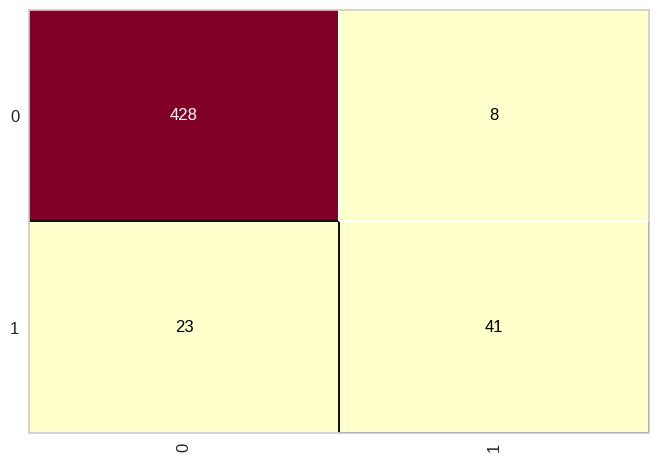

In [39]:
gnb_confusion_matrix = ConfusionMatrix(gnb_credit)
gnb_confusion_matrix.fit(x_credit_train, y_credit_train)
gnb_confusion_matrix.score(x_credit_test, y_credit_test)

##### Classification Report

In [48]:
print(classification_report(y_credit_test, gnb_credit_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



#### Modelo Decision Tree Classifier

In [42]:
dtc_credit_predict = dtc_credit.predict(x_credit_test)

##### Acurácia

In [43]:
dtc_accuracy = accuracy_score(y_credit_test, dtc_credit_predict)
dtc_accuracy

0.982

In [44]:
print('P(A) = ' + str(dtc_accuracy * 100) + '%')
pa = dtc_accuracy

P(A) = 98.2%


In [45]:
debtors = np.sum(y_credit_test == 1)
pb = debtors / len(y_credit_test)
print('P(B) = ' + str(pb * 100) + '%')

P(B) = 12.8%


In [46]:
pab = (pa * pb) / ((pa * pb) + ((1 - pa) * (1 - pb)))
print('P(A|B) = ' + str(round((pab * 100), 2)) + '%')

P(A|B) = 88.9%


##### Matriz Confusão

0.982

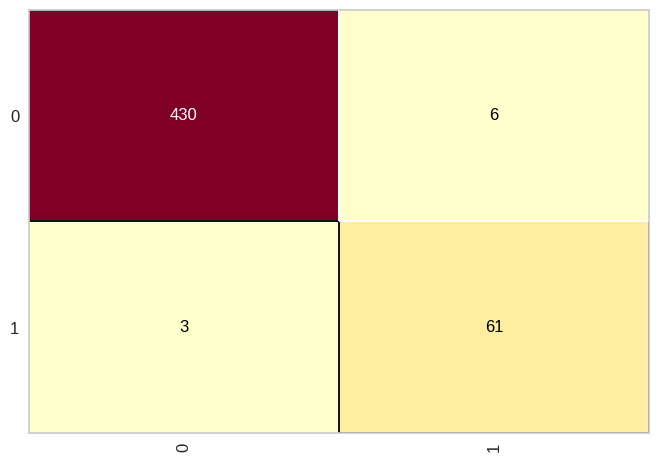

In [47]:
dtc_confusion_matrix = ConfusionMatrix(dtc_credit)
dtc_confusion_matrix.fit(x_credit_train, y_credit_train)
dtc_confusion_matrix.score(x_credit_test, y_credit_test)

##### Classification Report

In [49]:
print(classification_report(y_credit_test, dtc_credit_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



##### Visualização do Modelo

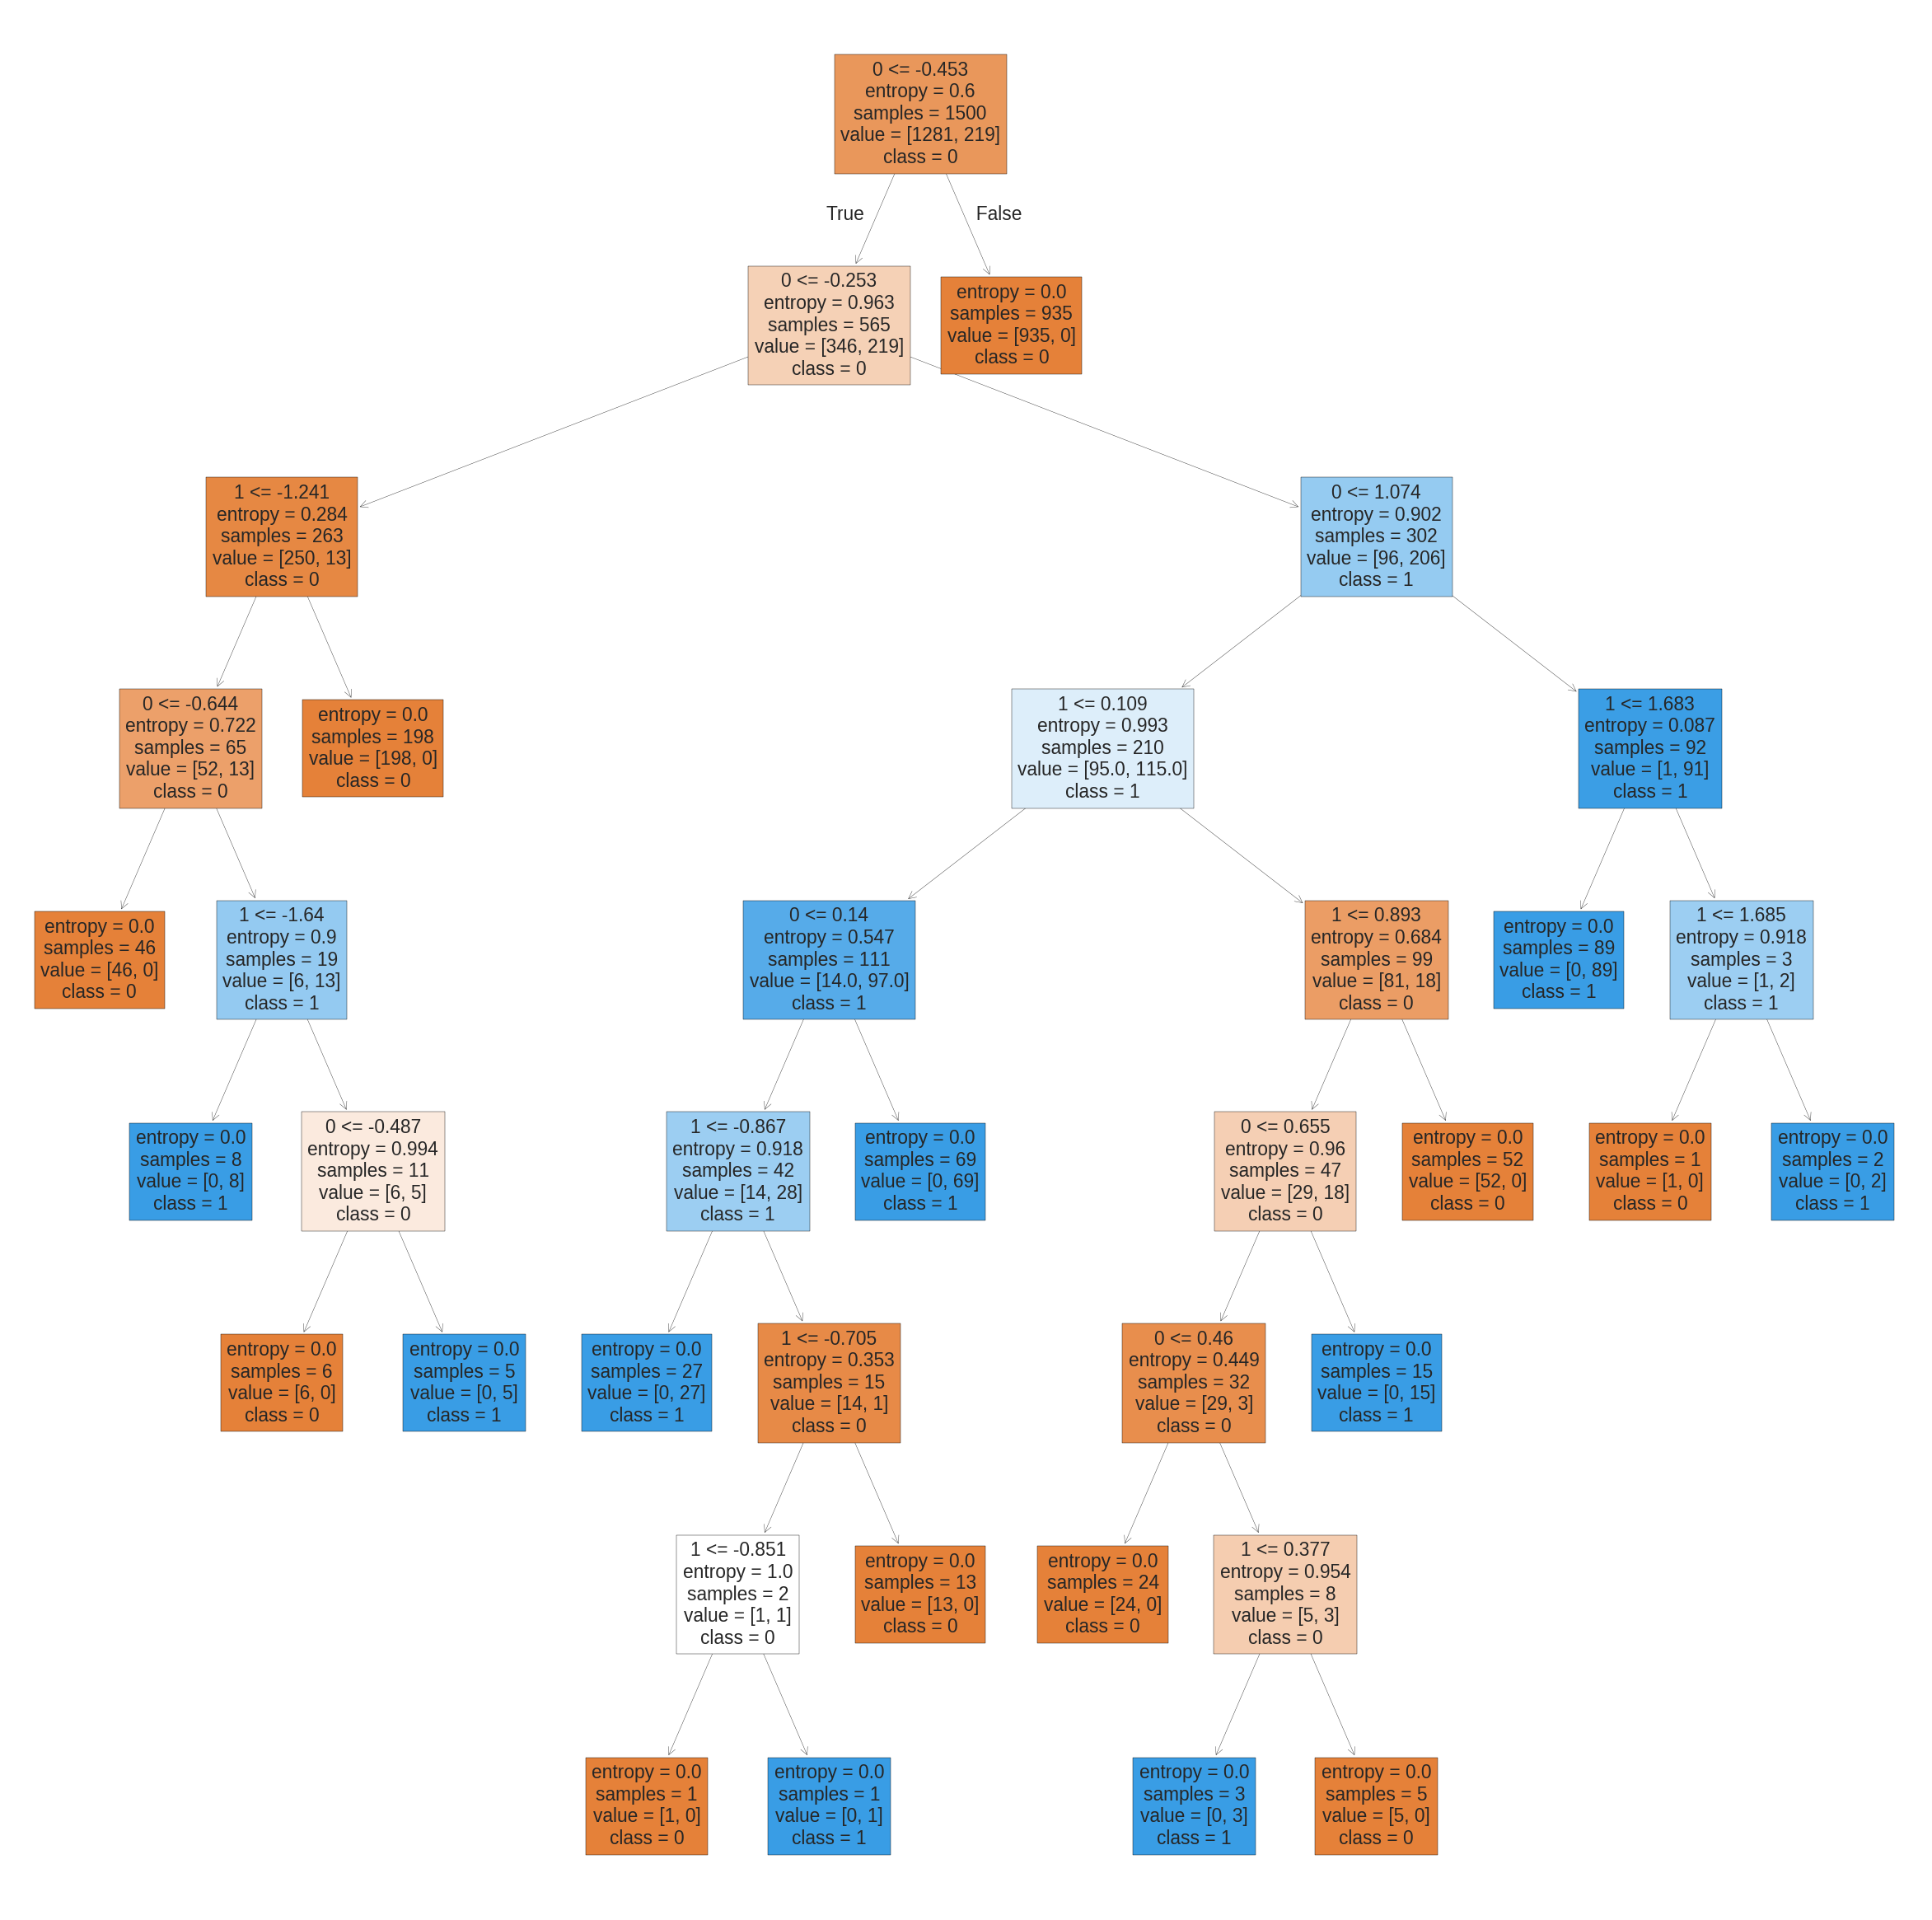

In [51]:
pa_tree = ['income', 'age', 'loan']
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,30))
tree.plot_tree(dtc_credit, feature_names=dtc_credit_predict, class_names=['0', '1'], filled=True)
figure.savefig('/content/drive/MyDrive/machine_learning_semestre_5/DecisionTreeClassifierCredit.png')

#### Modelo Random Forest Classifier

In [55]:
rfc_credit_predict = rfc_credit.predict(x_credit_test)

##### Acurácia

In [56]:
rfc_accuracy = accuracy_score(y_credit_test, rfc_credit_predict)
rfc_accuracy

0.984

In [57]:
print('P(A) = ' + str(rfc_accuracy * 100) + '%')
pa = rfc_accuracy

P(A) = 98.4%


In [58]:
debtors = np.sum(y_credit_test == 1)
pb = debtors / len(y_credit_test)
print('P(B) = ' + str(pb * 100) + '%')

P(B) = 12.8%


In [59]:
pab = (pa * pb) / ((pa * pb) + ((1 - pa) * (1 - pb)))
print('P(A|B) = ' + str(round((pab * 100), 2)) + '%')

P(A|B) = 90.03%


##### Matriz Confusão

0.984

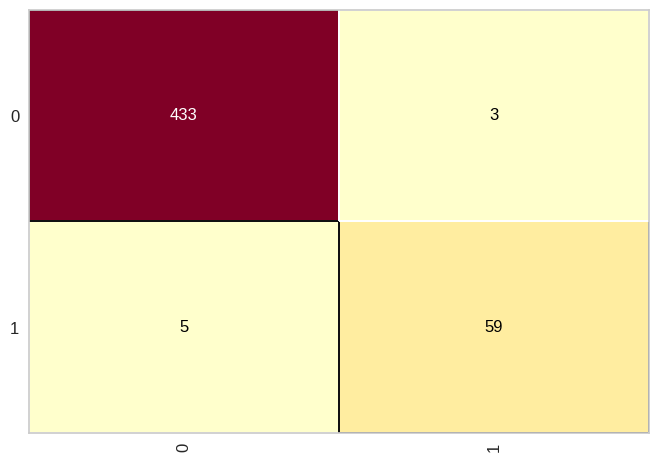

In [60]:
rfc_confusion_matrix = ConfusionMatrix(rfc_credit)
rfc_confusion_matrix.fit(x_credit_train, y_credit_train)
rfc_confusion_matrix.score(x_credit_test, y_credit_test)

##### Classification Report

In [61]:
print(classification_report(y_credit_test, rfc_credit_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500

